# Linear Regression - Ecommerce Customers

Parabéns! Você obteve algum contrato de trabalho com uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam.

A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site. Eles contrataram você no contrato para ajudá-los a descobrir isso! Vamos começar!

## Importando Bibliotecas

- Importing libs

In [77]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [78]:
# DESABILITANDO OS WARNINGS

warnings.filterwarnings('ignore')

In [79]:
# DEFININDO CONFIGURAÇÕES PARA OS PLOTS

sns.set(rc={'figure.figsize':(12, 8)})

## Funções úteis

- Utils Functions

In [80]:
def heatmap_plot_corr(data_corr):
    
    """
    
        FUNÇÃO PARA REALIZAR O PLOT DE MAPAS DE CALOR
        COM CONFIGURAÇÕES QUE PERMITEM UMA MELHOR VISUALIZAÇÃO
        DE CORRELAÇÃO ENTRE VARIÁVEIS
        
        # Arguments
            data_corr       - Required : Dados correlacionados (DataFrame)
        
        # Returns
    
    """
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # mask
    mask = np.triu(np.ones_like(data_corr, dtype=np.bool))
    
    # adjust mask and df
    mask = mask[1:, :-1]
    corr = data_corr.iloc[1:,:-1].copy()
    
    # plot heatmap
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
               vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    
    # yticks
    plt.yticks(rotation=0)
    plt.show()

In [81]:
def get_variables_model_x_y(dataframe, 
                        preditoras=None, 
                        target=None):
    
    """
    
        FUNÇÃO PARA REALIZAR O PLOT DE MAPAS DE CALOR
        COM CONFIGURAÇÕES QUE PERMITEM UMA MELHOR VISUALIZAÇÃO
        DE CORRELAÇÃO ENTRE VARIÁVEIS
        
        # Arguments
            dataframe       - Required : Dados para o modelo (DataFrame)
            preditoras      - Optional : Variáveis preditoras (List | Tuple)
            target          - Optional : Variável Target (String)
        
        # Returns
            X               - Required : Variáveis independentes (DataFrame)
            y               - Required : Variáveis dependentes (DataFrame)
    
    """
    
    # INICIALIZANDO AS VARIÁVEIS USADAS NO MODELO
    X = None
    y = None
    
    try:
        
        if target is not None:
        
            """
                VERIFICANDO SE O VALOR DE PREDITORAS 
                É UMA LISTA (CONTENDO AS COLUNAS DESEJADAS)
            """

            if isinstance(preditoras, list | tuple):
                X = dataframe[preditoras]
            else:
                X = dataframe.drop(target, axis=1)

            y = dataframe[target]
        
    except Exception as ex:
        print(ex)
        
    return X, y

In [82]:
def get_value_corr_between_variables(data_corr, 
                                     variable_one, 
                                     variable_two):
    
    """
    
        FUNÇÃO PARA OBTER O VALOR DE CORRELAÇÃO ENTRE DUAS VARIÁVEIS.
        
        USA O CÁLCULO DE CORRELAÇÃO PARA TODAS VARIÁVEIS
        E FILTRA O VALOR ENTRE DUAS VARIÁVEIS ESPECIFICADAS
        
        # Arguments
            data_corr           - Required : Correlações obtidas (DataFrame)
            variable_one        - Optional : Variável 1 (String)
            variable_two        - Optional : Variável 2 (String)
        
        # Returns
            corr_variables      - Required : Valor de correlação
                                             entre as variáveis (Float)
    
    """
    
    # INICIANDIO AS VARIÁVEIS DE RESULTADO
    corr_variables = None
    
    # VERIFICANDO SE AS VARIÁVEIS ESTÃO NO DATAFRAME
    if (variable_one in data_corr.index) and (variable_two in data_corr.index):
    
        corr_variables = customers_corr[customers_corr.index == variable_one][variable_two].values[0]
        
    return corr_variables

## Variáveis Globais

- Global Variables

In [83]:
# SEMENTE PARA RANDOMIZAÇÃO PSEUDOALEATÓRIA DOS DADOS
SEED = 42

In [84]:
# PROPORÇÃO ENTRE SEPARAÇÃO DE DADOS PARA TREINAMENTO DO MODELO E TESTE
# PERCENTUAL DE DADOS PARA TESTE
test_size = 0.3

## Obter dados

- Get data

Trabalharemos com o arquivo csv do Ecommerce Customers da empresa. 
Esse dataset possui informações do cliente, como Email, Endereço e sua cor Avatar. 
Ele também possui colunas de valores numéricos:.

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Length of Membership: Há quantos anos o cliente é membro da plataforma.
* Yearly Amount Spent: Gasto anual do cliente

In [85]:
df_customers = pd.read_csv("DATA/Ecommerce Customers")

** Verifique o cabeçalho dos clientes e confira os seus métodos info () e describe(). **

In [86]:
df_customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [87]:
df_customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [88]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Análise exploratória de dados

- Exploratory data analysis

In [89]:
# OBTENDO A CORRELAÇÃO ENTRE OS DADOS (PEARSON CORRELATION)

customers_corr = df_customers.corr()

<AxesSubplot:>

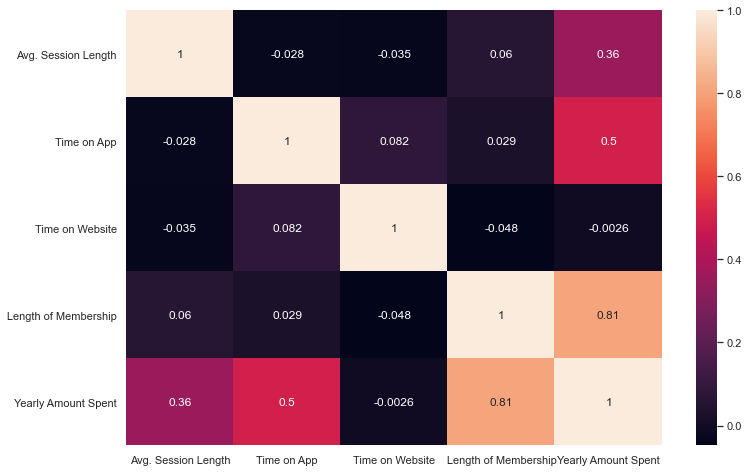

In [90]:
# REALIZANDO O PLOT COM O MAPA DE CALOR TRADICIONAL DO SEABORN

sns.heatmap(customers_corr, annot=True)

Esse mapa de calor apresenta uma visão que pode ser melhorada:
    
1. Eliminando a diagonal principal, com correlações entre a mesma variável, no qual o resultado é sempre 1.
2. Duplicidade de correlações (Ex: Correlação entre X e Y e depois Y e X).

This heatmap show one plot that can be improved:

1. Deleting the main diagonal that contains correlations between same variable where the result is always 1.
2. Duplicated correlations (Ex: Correlation between X and Y and after Y and X).

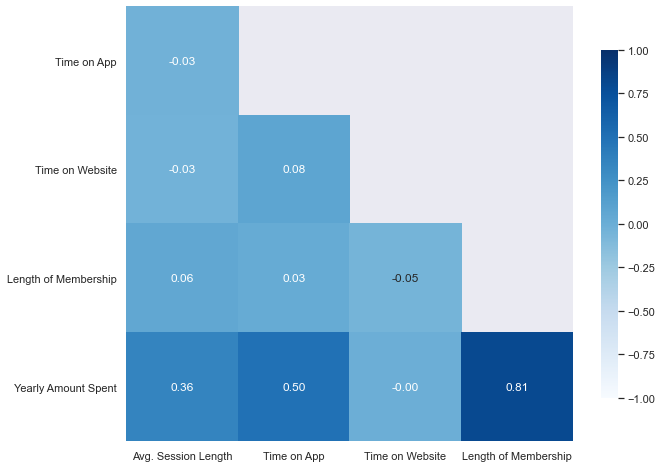

In [91]:
# REALIZANDO O PLOT COM O MAPA DE CALOR DA FUNÇÃO ÚTIL CRIADA

heatmap_plot_corr(customers_corr)

### Relação entre tempo no website e o gasto anual do cliente

- Relationship between Time on Website and Yearly Amount Spent

In [92]:
variable_one = 'Time on Website'
variable_two = 'Yearly Amount Spent'

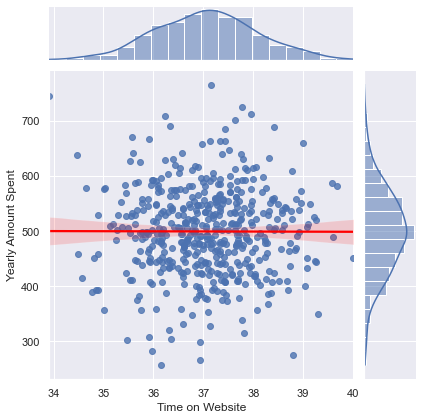

In [93]:
sns.jointplot(x=variable_one, 
              y=variable_two, 
              data=df_customers, 
              kind='reg', 
              joint_kws={'line_kws': {'color':'red'}})

In [94]:
corr_variables = get_value_corr_between_variables(data_corr=customers_corr, 
                                                  variable_one=variable_one, 
                                                  variable_two=variable_two)

In [95]:
print("PEARSON CORRELATION: {value} ENTRE {var_one} E {var_two}".format(value=corr_variables, 
                                                                        var_one=variable_one, 
                                                                        var_two=variable_two))

PEARSON CORRELATION: -0.0026408446721577087 ENTRE Time on Website E Yearly Amount Spent


### Relação entre tempo no app e o gasto anual do cliente

- Relationship between Time on App and Yearly Amount Spent

In [96]:
variable_one = 'Time on App'
variable_two = 'Yearly Amount Spent'

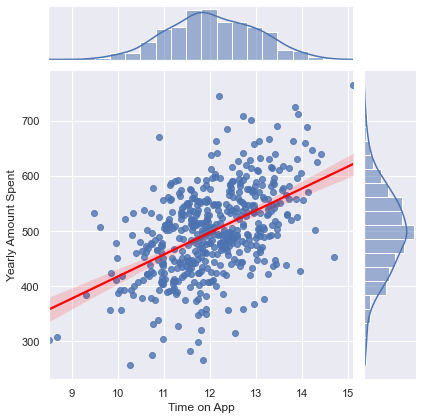

In [97]:
sns.jointplot(x=variable_one, 
              y=variable_two, 
              data=df_customers, 
              kind='reg', joint_kws={'line_kws': {'color':'red'}})

In [98]:
corr_variables = get_value_corr_between_variables(data_corr=customers_corr, 
                                                  variable_one=variable_one, 
                                                  variable_two=variable_two)

In [99]:
print("PEARSON CORRELATION: {value} ENTRE {var_one} E {var_two}".format(value=corr_variables, 
                                                                        var_one=variable_one, 
                                                                        var_two=variable_two))

PEARSON CORRELATION: 0.4993277700534506 ENTRE Time on App E Yearly Amount Spent


### Relação entre tempo no app e o tempo de associação do cliente

- Relationship between Time on App and Time of Membership

** Usando um lote de caixa hexagonal 2D que compara tempo no aplicativo (Time on App) e o tempo da associação (Length of Membership). **

In [103]:
variable_one = 'Time on App'
variable_two = 'Length of Membership'

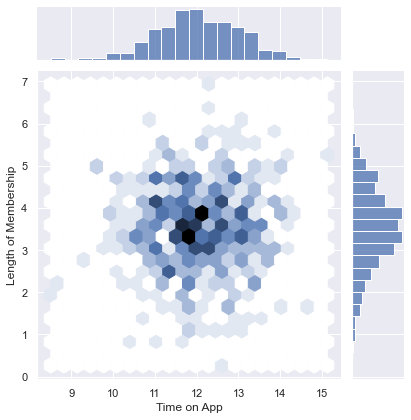

In [104]:
sns.jointplot(x=variable_one, 
              y=variable_two, 
              data=df_customers, 
              kind='hex')

### Relações entre todas as variáveis do conjunto de dados

- Relationship between all dataset variables

In [ ]:
sns.pairplot(df_customers)

** Baseado neste plot o que parece ser a característica mais correlacionada com o valor anual gasto (Yearly Amount Spent)? **

### Linear Plot entre (Yearly Amount Spent) vs (Length of Membership)

- Linear plot between Yearly Amount Spent and Length of Membership

In [ ]:
sns.lmplot(x='Length of Membership', 
           y='Yearly Amount Spent', 
           data=clientes, 
           line_kws={'color':'red'})

## Treinando e testando um modelo

- Train and Test a model

Target: Yearly Amount Spent

In [ ]:
lista_colunas_preditoras_desejadas = ['Avg. Session Length', 
                                      'Time on App', 
                                      'Time on Website', 
                                      'Length of Membership']

In [ ]:
X, y = get_variables_model_x_y(clientes, 
                           preditoras=lista_colunas_preditoras_desejadas,
                           target="Yearly Amount Spent")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_sizee, 
                                                    random_state=SEED)

## Treinando o modelo

Agora é hora de treinar nosso modelo em nossos dados de treinamento!

** Importe LinearRegression do sklearn.linear_model **

** Crie uma instância de um modelo LinearRegression () chamado lm. **

In [ ]:
lm = LinearRegression()

** Treine lm nos dados de treinamento. **

In [ ]:
lm.fit(X_train, y_train)

**Print os coeficientes do modelo**

In [ ]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

## Previsão de dados de teste
Agora que nos ajustamos ao nosso modelo, vamos avaliar o seu desempenho ao prever os valores de teste!

** Use lm.predict () para prever o conjunto X_test dos dados. **

In [ ]:
predictions = lm.predict(X_test)

** Crie um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos. **

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

## Avaliando o Modelo

Vamos avaliar o desempenho do nosso modelo calculando a soma residual dos quadrados e o escore de variância explicado (R ^ 2).

** Calcule o erro absoluto médio, o erro quadrado médio e o erro quadrado médio da raiz. Consulte a palestra ou a Wikipédia para as fórmulas **

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(clientes, x="Yearly Amount Spent")
fig.show()

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
10/500

## Resíduos

Você deve ter obtido um modelo muito bom com um bom ajuste. Vamos explorar rapidamente os resíduos para garantir que tudo esteja bem com os nossos dados.

** Trace um histograma dos resíduos e certifique-se de que ele parece normalmente distribuído. Use o seaborn distplot, ou apenas o plt.hist (). **

In [ ]:
sns.distplot((y_test-predictions), bins=50)

**Plot residual**

In [ ]:
plt.scatter(y_test, y_test-predictions)
plt.xlabel("Valores reais")
plt.ylabel("Valores residuais")
plt.show()

## Conclusão
Ainda desejamos descobrir a resposta à pergunta original, concentramos-nos no desenvolvimento de aplicativos móveis ou de sites? Ou talvez isso realmente não importe, e o tempo como membro é o que é realmente importante? Vamos ver se podemos interpretar os coeficientes para ter uma idéia.

** Recrie o quadro de dados abaixo. **

In [ ]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

** Como você pode interpretar esses coeficientes? **

** Você acha que a empresa deve se concentrar mais em seu aplicativo móvel ou em seu site? **

## EXTRA - TESTANDO OUTROS MODELOS

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
range_alpha = np.arange(0, 100, step=1)

In [ ]:
model_ridge = Ridge
model_lasso = Lasso

models = [model_ridge, model_lasso]

In [ ]:
error = []
df_error = pd.DataFrame()

for model_atual in models:

    for value_alpha in range_alpha:

        # INSTANCIANDO O MODELO
        model_atual_alpha = model_atual(value_alpha)

        # APRENDENDO COM OS DADOS
        model_atual_alpha.fit(X_train, y_train)

        # REALIZANDO A PREDIÇÃO
        predictions = model_atual_alpha.predict(X_test)

        error.append([model_atual.__name__, 
                      value_alpha, 
                      np.sqrt(metrics.mean_squared_error(y_test, predictions))])

    df_error = pd.DataFrame(error, columns=["MODEL", "ALPHA", "ERROR"])

In [ ]:
df_error

In [ ]:
fig = px.line(df_error, x="ALPHA", y="ERROR", title='Error using many alphas', color='MODEL')
fig.show()

## CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
lm_reg = LinearRegression()

In [ ]:
def realiza_cross_validation(model, X, y, kfolds = 10, scoring_metrics = None, score_train = False):
    
    
    try:
        if scoring_metrics is not None:
            # REALIZANDO O CROSS VALIDATION
            cv_results = cross_validate(model, X, y, cv=kfolds, 
                                        scoring=scoring_metrics, 
                                        return_train_score=score_train)

            # INICIANDO A VARIÁVEL QUE ARMAZENARÁ OS RESULTADOS
            lista_metricas = []

            # OBTENDO OS RESULTADOS
            for metrica in cv_results.keys():
                lista_metricas.append([metrica, abs(cv_results[metrica].mean())])

            # SALVANDO OS RESULTADOS EM UM DATAFRAME
            df_cross_validation_results = pd.DataFrame(lista_metricas)

            return df_cross_validation_results
        else:
            print("VOCÊ DEVE ESCOLHER UMA MÉTRICA DE SCORE")
    except Exception as ex:
        print(ex)

In [ ]:
realiza_cross_validation(lm_reg, X, y, kfolds=5, 
                         scoring_metrics = ('r2', 'neg_root_mean_squared_error'), 
                         score_train = True)